# Forecasting (Quantitative Analysis for Business, IBSU) 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [20]:
df=pd.read_excel(r'C:\Users\berid\OneDrive\Desktop\HA2 Giorgi Beridze (Forecasting).xlsx')
df=df.loc[:251,['Period','Month','Value']]

In [21]:
df

,Period,Month,Value
0,1,2000-01-01 00:00:00,41.1
1,2,2000-02-01 00:00:00,44.6
2,3,2000-03-01 00:00:00,45.7
3,4,2000-04-01 00:00:00,44.7
4,5,2000-05-01 00:00:00,43.0
...,...,...,...
247,248,2020-08-01 00:00:00,8.3
248,249,2020-09-01 00:00:00,8.8
249,250,2020-10-01 00:00:00,9.3
250,251,2020-11-01 00:00:00,8.3


# Least Squares Method

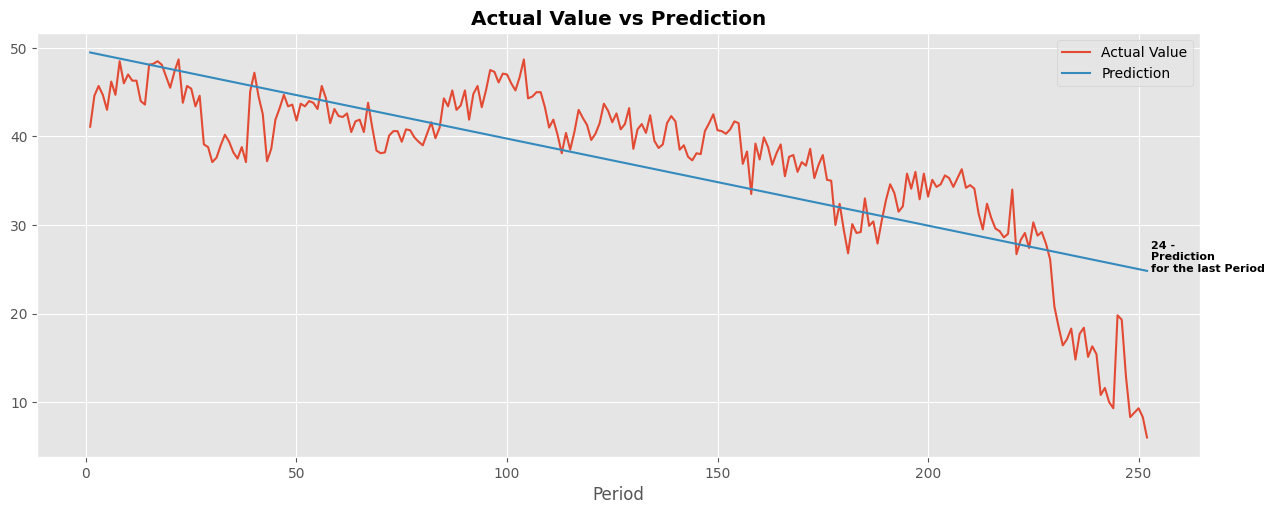

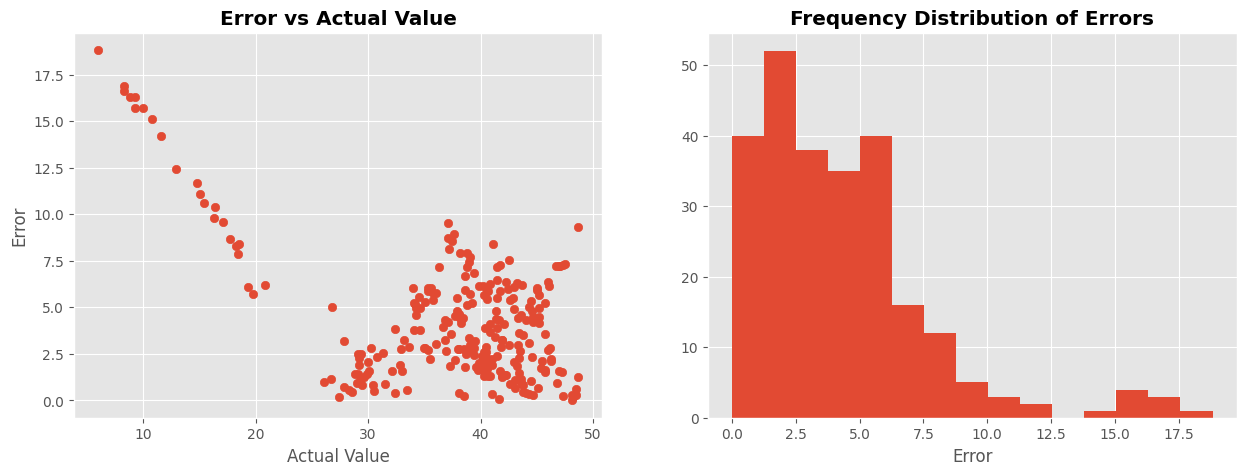

Prediction for the last period is 24.719095048377888
AVG MAPE is 0.17799282043679984


In [22]:
XY=df['Period']*df['Value']
X_squared=df['Period']**2

XY_sum=XY.sum()
Xbar=df['Period'].mean()
Ybar=df['Value'].mean()
X_squared_sum=X_squared.sum()
X_bar_squared=Xbar**2

b=(XY_sum-len(df)*Xbar*Ybar)/(X_squared_sum-len(df)*X_bar_squared)
a=Ybar-Xbar*b

prediction=a+b*df['Period']
last_prediction=a+b*(len(df)+1)

errors=(df['Value']-prediction).abs()
MAPE=errors/df['Value']
avg_MAPE=MAPE.mean()


#visualization of results
plt.figure(figsize=(15,5.5))
plt.plot(df['Period'],df['Value'],label='Actual Value'),plt.plot(df['Period'],prediction,label='Prediction')
plt.title('Actual Value vs Prediction',fontweight='bold')
plt.xlabel('Period')
plt.text(len(df)+1,last_prediction,f'{int(last_prediction)} - \nPrediction\nfor the last Period',fontweight='bold',size=8)
plt.legend()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(df['Value'],errors)
ax1.set_title('Error vs Actual Value',fontweight='bold')
ax1.set_xlabel('Actual Value'),ax1.set_ylabel('Error')

ax2.hist(errors,bins=15)
ax2.set_title('Frequency Distribution of Errors',fontweight='bold')
ax2.set_xlabel('Error')

plt.show()

print(f'Prediction for the last period is {last_prediction}')
print(f'AVG MAPE is {avg_MAPE}')

# Exponential Smoothing 

In [23]:
df

,Period,Month,Value
0,1,2000-01-01 00:00:00,41.1
1,2,2000-02-01 00:00:00,44.6
2,3,2000-03-01 00:00:00,45.7
3,4,2000-04-01 00:00:00,44.7
4,5,2000-05-01 00:00:00,43.0
...,...,...,...
247,248,2020-08-01 00:00:00,8.3
248,249,2020-09-01 00:00:00,8.8
249,250,2020-10-01 00:00:00,9.3
250,251,2020-11-01 00:00:00,8.3


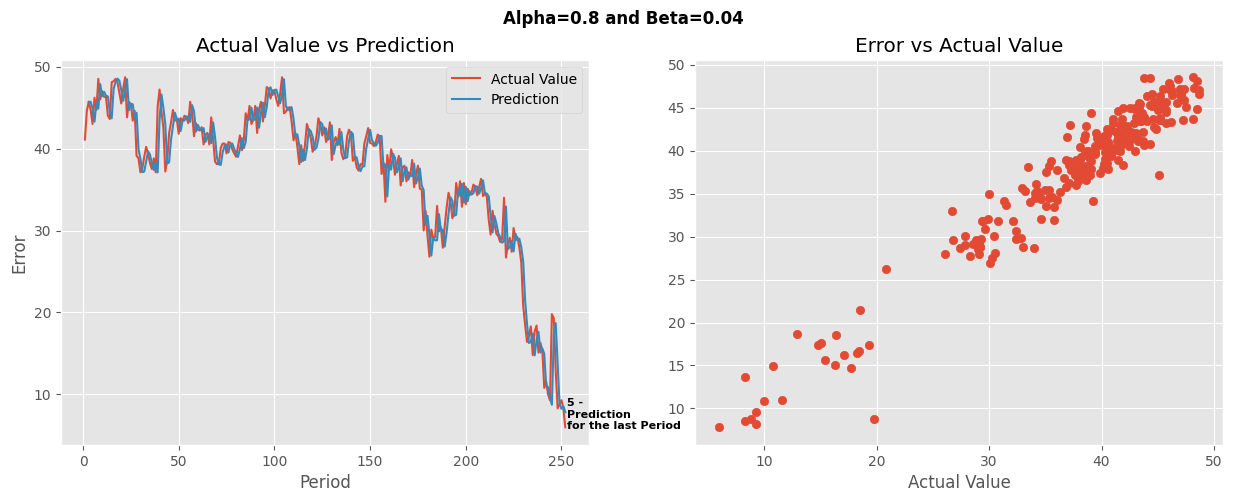

The Best Average MAPE is 5.4053


Top 10 Combinations:


{(0.8, 0.04): 5.405311474892199,
 (0.8, 0.02): 5.412693707358132,
 (0.82, 0.02): 5.426292429846807,
 (0.8, 0.06): 5.429624180767857,
 (0.82, 0.04): 5.430744098025581,
 (0.84, 0.02): 5.44614274661399,
 (0.82, 0.06): 5.456311221949247,
 (0.84, 0.04): 5.457995523771338,
 (0.8, 0.08): 5.464239418568686,
 (0.86, 0.02): 5.472646140685119,
 (0.84, 0.06): 5.4845171234005905}

In [24]:
avg_MAPE_dict={}
def exponential_smoothing(alpha,beta):
    exp_smooth_list=[None,None,df['Value'][2]]
    trend_list=[None,None,0]

    for i in range(len(df)+1): #+1 for the last period:
        if i>=3:
            exp_smooth=alpha*df['Value'][i-1]+(1-alpha)*(exp_smooth_list[i-1]+trend_list[i-1])
            exp_smooth_list.append(exp_smooth)
            trend=beta*(exp_smooth-exp_smooth_list[i-1])+(1-beta)*trend_list[i-1]
            trend_list.append(trend)

    FIT=[i+j if str(i)!='None' and str(j)!='None' else None for i,j in zip(exp_smooth_list,trend_list)]
    last_prediction=FIT[-1]
    prediction=pd.Series(FIT[:-1])
    
    error=(df['Value']-pd.Series(FIT[:-1])).abs()
    MAPE=error/df['Value']
    avg_MAPE=MAPE.mean()*100
    avg_MAPE_dict[alpha.round(2),beta.round(2)]=avg_MAPE
    
    #visualization
    if avg_MAPE<5.41:  #select combinations that output MAPE<5.41%
        fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
        ax1.plot(df['Period'],df['Value'],label='Actual Value'),ax1.plot(df['Period'],prediction,label='Prediction')
        ax1.set_title(f'Actual Value vs Prediction')
        ax1.set_xlabel('Period')
        ax1.text(len(df)+1,last_prediction,f'{int(last_prediction)} - \nPrediction\nfor the last Period',fontweight='bold',size=8)
        ax1.legend()

        ax2.scatter(df['Value'],prediction)
        ax2.set_title('Error vs Actual Value')
        ax2.set_xlabel('Actual Value'),ax1.set_ylabel('Error')
        plt.suptitle(f'Alpha={alpha.round(2)} and Beta={beta.round(2)}',fontweight='bold')
        plt.show()

        print(f'The Best Average MAPE is {(avg_MAPE).round(4)}')
    else:
        None
            

for a in np.arange(0.8,1,0.02):
    for b in np.arange(0,2,0.02):
        exponential_smoothing(a,b) 
sorted_dict=dict(sorted(avg_MAPE_dict.items(), key=lambda item: item[1],reverse=False)) #from best to worst
print('\n\nTop 10 Combinations:')
{k:v for k,v in sorted_dict.items() if list(sorted_dict.keys()).index(k)<=10}

# Machine Learning Model

In [25]:
df_copy=df

for i in range(1,6):
    df_copy[f'Shift_{i}']=df_copy['Value'].shift(i)
    
df_copy=df_copy.dropna()

In [26]:
df_copy=df_copy.apply(pd.to_numeric,errors='coerce')

In [27]:
train=df_copy.iloc[:-45,:]
test=df_copy.iloc[-45:,:]
X_train,X_test,y_train,y_test=train.drop(columns=['Month','Value']),test.drop(columns=['Month','Value']),train['Value'],test['Value']

In [28]:
len(X_train),len(X_test),len(y_train),len(y_test)

(202, 45, 202, 45)

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [32]:
from sklearn import metrics

r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
print('R2,MAE,RMSEfortrainandtestdataare:')
print(r2_train,r2_test)
print(mae_train,mae_test)
print(rmse_train,rmse_test)

R2,MAE,RMSEfortrainandtestdataare:
0.8024680846764886 0.7569876095911714
1.4601952478846199 2.960692554123267
1.8654527485514465 3.726290272199971


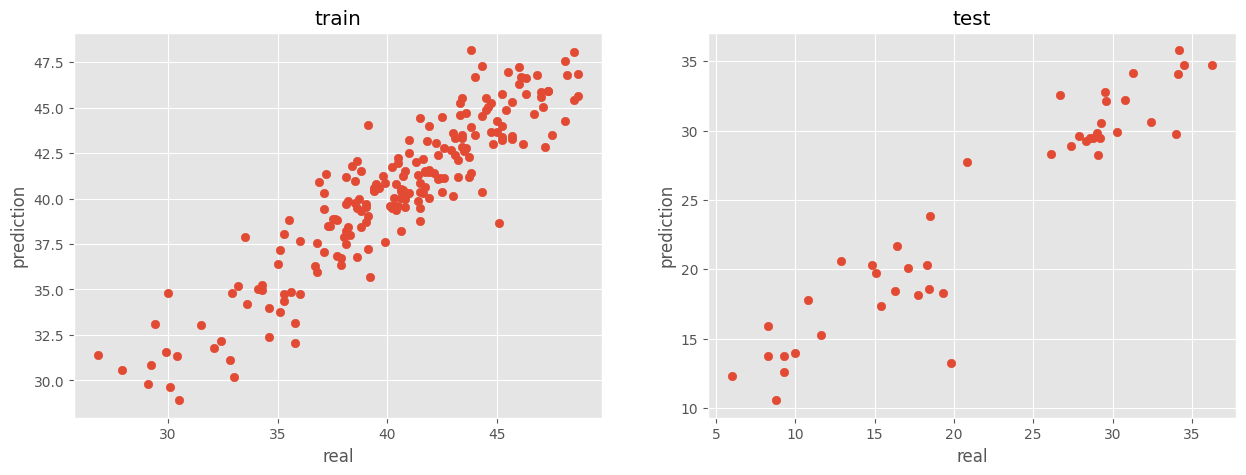

In [33]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(y_train,train_prediction)
ax1.set_xlabel('real')
ax1.set_ylabel('prediction')
ax1.set_title('train')
ax2.scatter(y_test,test_prediction)
ax2.set_xlabel('real')
ax2.set_ylabel('prediction')
ax2.set_title('test')
plt.show()

In [34]:
X_test['Real']=y_test
X_test['Prediction']=test_prediction
test=X_test

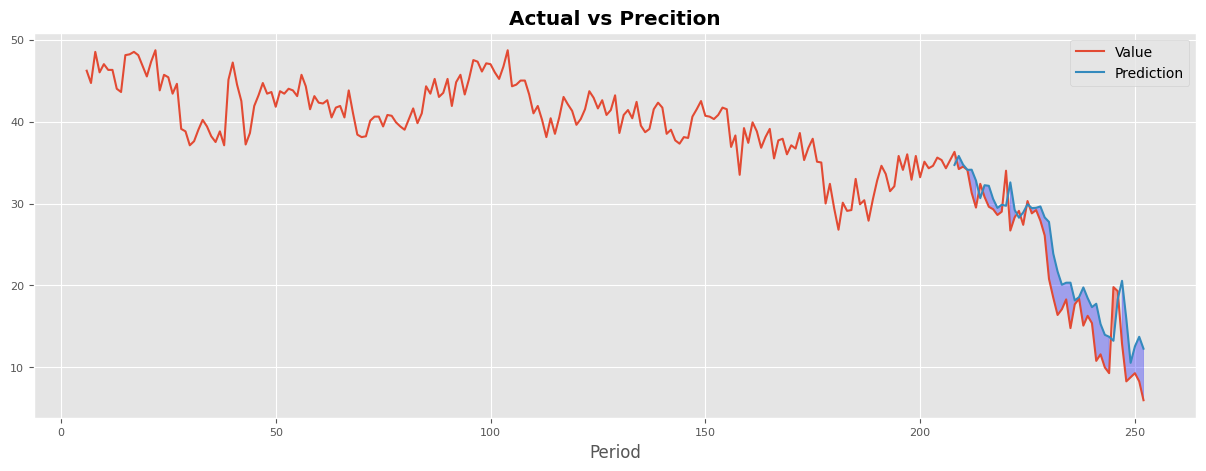

In [35]:
merged=df_copy.merge(test['Prediction'],how='left',left_index=True,right_index=True)
merged.plot.line(figsize=(15,5),x='Period',y=['Value','Prediction'],fontsize=8)
plt.title('Actual vs Precition',fontweight='bold')
plt.fill_between(merged['Period'],merged['Value'],merged['Prediction'],where=merged['Prediction']>merged['Value'],color='blue',alpha=0.3)
plt.fill_between(merged['Period'],merged['Value'],merged['Prediction'],where=merged['Prediction']<merged['Value'],color='red',alpha=0.3)
plt.show()

In [36]:
# not as precise as Exponential Smoothing Model